Aminoasit Dizilimlerinin Veri Kümesi Oluşturulması:
Her dizilim belirli bir uzunlukta olacak ve rastgele 20 aminoasit (A, R, N, D, C, vb.) kullanılarak oluşturulacak.

Aminoasit Dizilimleri: generate_amino_acid_sequence fonksiyonu rastgele uzunlukta aminoasit dizilimleri üretir. Dizilimler, biyoinformatikte sıklıkla kullanılan 20 aminoasitten oluşur.

Sınıflandırma Etiketleri: 0 hastalıksız durumu temsil ederken, 1 ise hastalık riskini temsil eder.

Örnek Veri Çıkışı:

Amino_Acid_Sequence  Class
0          GLKNQDHWYFVVEIYPWAPSECLRVGDN       0
1          IYDRLSTWDVQKSFHYPMGEQSTLIW     1
2          CWNDRSKYVFPEKLSNHWIVNAY         0
3          TSYGFVMELPQDRHTWRAQNDQGCVTMVHYDRF      1
4          HRTSWNCDPEQHFGVILFPLM          0




In [ ]:
import random
import pandas as pd

# Aminoasitlerin tek harfli kodları
aminoacids = list("ARNDCEQGHILKMFPSTWYV")

# Rastgele aminoasit dizilimi oluşturan fonksiyon
def generate_amino_acid_sequence(length):
    return ''.join(random.choices(aminoacids, k=length))

# Veri kümesini oluşturma
def create_amino_acid_dataset(num_sequences, sequence_length):
    data = []
    for _ in range(num_sequences):
        sequence = generate_amino_acid_sequence(sequence_length)
        label = random.choice([0, 1])  # 0: Hastalıksız, 1: Hastalık Riski
        data.append([sequence, label])

    df = pd.DataFrame(data, columns=['Amino_Acid_Sequence', 'Class'])
    return df

# 100 örnekten oluşan veri kümesini oluşturma (örneğin dizilim uzunluğu 50)
amino_acid_df = create_amino_acid_dataset(num_sequences=100, sequence_length=50)

# Veri kümesini CSV dosyası olarak kaydetme
amino_acid_df.to_csv('amino_acid_dataset.csv', index=False)

# Veri kümesine göz atalım
print(amino_acid_df.head())


                                 Amino_Acid_Sequence  Class
0  LSQMQKMGMDWQWTDTNENTMFLAIPMGPMFCVTPYLGHYNSLIDM...      1
1  HTCGQLFLNFCSIWAHFMGAVDNELRYTPAQCGNYNGGQTQTWIHL...      1
2  LPFSCSAQLDKMNWPIDMWFRHSKCLDENPMNLLCHEAYNNADLLG...      1
3  GCEDQWADKMILYTYYNHFGQDNEMGPLETWEGHLARYIVDDRATE...      1
4  NCYCEPFRGSNRCSLITSASKQGPRWDDNHEEELPYSCQADKADKT...      0


In [ ]:
import random
import pandas as pd

# Aminoasitlerin tek harfli kodları
aminoacids = list("ARNDCEQGHILKMFPSTWYV")

# Rastgele aminoasit dizilimi oluşturan fonksiyon (değişken uzunlukta)
def generate_amino_acid_sequence(min_length, max_length):
    length = random.randint(min_length, max_length)  # Dizilim uzunluğunu rastgele seç
    return ''.join(random.choices(aminoacids, k=length))

# Veri kümesini oluşturma
def create_amino_acid_dataset(num_sequences, min_length, max_length):
    data = []
    for _ in range(num_sequences):
        sequence = generate_amino_acid_sequence(min_length, max_length)
        label = random.choice([0, 1])  # 0: Hastalıksız, 1: Hastalık Riski
        data.append([sequence, label])

    df = pd.DataFrame(data, columns=['Amino_Acid_Sequence', 'Class'])
    return df

# 100 örnekten oluşan veri kümesini oluşturma (örneğin dizilim uzunluğu 30 ile 100 arasında)
amino_acid_df = create_amino_acid_dataset(num_sequences=100, min_length=30, max_length=100)

# Veri kümesini CSV dosyası olarak kaydetme
amino_acid_df.to_csv('variable_length_amino_acid_dataset.csv', index=False)

# Veri kümesine göz atalım
print(amino_acid_df.head())


                                 Amino_Acid_Sequence  Class
0              HPRLGMGFGRGEVHWRNDAGWDYMCDASLCDYAHAVN      1
1  QFKLNMIWMGCRMHFFRGDRRKRNFSYIANVYTTGFLGFLKWCIYP...      1
2  ASSVEGYEIGEWRNAHEVLPGFMQENHDVGGLATHEPSRDIMWKPH...      0
3  KMVVYNRLIPYLSQAMIQTSQRCFEIWKGFNELYCMQISEHQWGLE...      1
4  SIYLELEDIWPTYMIPVVMIWHRERHGFHQKWRGWIWCFKDDKENR...      0


In [ ]:
import random
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Aminoasitlerin tek harfli kodları
aminoacids = list("ARNDCEQGHILKMFPSTWYV")

# Rastgele aminoasit dizilimi oluşturan fonksiyon (değişken uzunlukta)
def generate_amino_acid_sequence(min_length, max_length):
    length = random.randint(min_length, max_length)  # Dizilim uzunluğunu rastgele seç
    return ''.join(random.choices(aminoacids, k=length))

# Veri kümesini oluşturma
def create_amino_acid_dataset(num_sequences, min_length, max_length):
    data = []
    for _ in range(num_sequences):
        sequence = generate_amino_acid_sequence(min_length, max_length)
        label = random.choice([0, 1])  # 0: Hastalıksız, 1: Hastalık Riski
        data.append([sequence, label])

    df = pd.DataFrame(data, columns=['Amino_Acid_Sequence', 'Class'])
    return df

# 100 örnekten oluşan veri kümesini oluşturma
amino_acid_df = create_amino_acid_dataset(num_sequences=100, min_length=30, max_length=100)

# Veri kümesini CSV dosyası olarak kaydetme
amino_acid_df.to_csv('variable_length_amino_acid_dataset.csv', index=False)

# Veri Kümesini Yükleme
df = pd.read_csv('variable_length_amino_acid_dataset.csv')

# Veri kümesini kontrol et
print("Veri Kümesi:")
print(df.head())

# Boş dizilimleri kaldır
df = df[df['Amino_Acid_Sequence'].str.strip() != '']

# Amino asit dizilimlerini sayısallaştırma
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))

try:
    X = vectorizer.fit_transform(df['Amino_Acid_Sequence'])  # Amino asit dizilimlerini sayısallaştır
    y = df['Class']  # Sınıf etiketleri

    # 2. Veriyi Eğitim ve Test Setlerine Ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Model Seçenekleri
    model = LogisticRegression(max_iter=1000)

    # 4. Modeli Eğitme
    model.fit(X_train, y_train)

    # 5. Model Performansını Değerlendirme
    y_pred = model.predict(X_test)

    # Sonuçların değerlendirilmesi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

except ValueError as e:
    print(f"Hata: {e}")


Veri Kümesi:
                                 Amino_Acid_Sequence  Class
0              EWKTRVYVMVKFRPDRDGHFMWDCDYIKRRDCMYVGF      0
1  YPFGNIISMVVPACEHLLFSFEAGITRRCQGLAGDNMYIFFNTEEA...      0
2  EHKMHSKKRISGCKFYKTNFWGFSAQHWDFISDRPEDTDQIHNWDY...      1
3  PAHEKWKWRMRGWRVMPMHYTPEMYPRVWDYEICGVEPFYEICPGI...      0
4                   TAQENHWMFMLCWRSHQEFMGGQGPRMAQTYS      1
Model Accuracy: 45.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.42      0.56      0.48         9

    accuracy                           0.45        20
   macro avg       0.46      0.46      0.45        20
weighted avg       0.46      0.45      0.45        20



Veri Kümesi:
                                 Amino_Acid_Sequence  Class
0                     SVMNNQNFNARIGDCNWWNWKIVMAIGPKH      1
1             PPHSNYNQPKAPPMDNGGQIIPQMERMEWWFNMMIFTL      1
2           EEPKPCVWLWTCQYYCWIFHNDCYVMKIHYLARFYYWDDE      1
3            KGSQFNGHTLNMSMNTYQRSTIMPWSTQDGFESKHVCRQ      1
4  MGSTDHYPEVMSDTCGSWSHVNGWMPNEKVMEKRWMYGRWWQIVQF...      0
Model: Logistic Regression
Accuracy: 25.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.25      0.18      0.21        11

    accuracy                           0.25        20
   macro avg       0.25      0.26      0.25        20
weighted avg       0.25      0.25      0.24        20

Model: Random Forest
Accuracy: 45.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.50      0.36      0.42        11

    ac

<ipython-input-20-c6ce02ee58c2>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


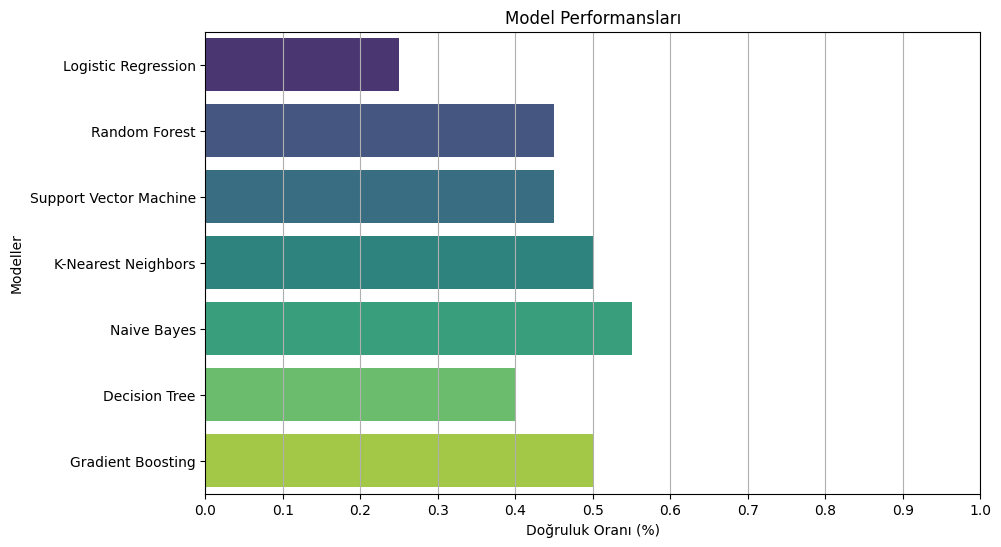

In [20]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Aminoasitlerin tek harfli kodları
aminoacids = list("ARNDCEQGHILKMFPSTWYV")

# Rastgele aminoasit dizilimi oluşturan fonksiyon (değişken uzunlukta)
def generate_amino_acid_sequence(min_length, max_length):
    length = random.randint(min_length, max_length)  # Dizilim uzunluğunu rastgele seç
    return ''.join(random.choices(aminoacids, k=length))

# Veri kümesini oluşturma
def create_amino_acid_dataset(num_sequences, min_length, max_length):
    data = []
    for _ in range(num_sequences):
        sequence = generate_amino_acid_sequence(min_length, max_length)
        label = random.choice([0, 1])  # 0: Hastalıksız, 1: Hastalık Riski
        data.append([sequence, label])

    df = pd.DataFrame(data, columns=['Amino_Acid_Sequence', 'Class'])
    return df

# 100 örnekten oluşan veri kümesini oluşturma
amino_acid_df = create_amino_acid_dataset(num_sequences=100, min_length=30, max_length=100)

# Veri kümesini CSV dosyası olarak kaydetme
amino_acid_df.to_csv('variable_length_amino_acid_dataset.csv', index=False)

# Veri Kümesini Yükleme
df = pd.read_csv('variable_length_amino_acid_dataset.csv')

# Veri kümesini kontrol et
print("Veri Kümesi:")
print(df.head())

# Boş dizilimleri kaldır
df = df[df['Amino_Acid_Sequence'].str.strip() != '']

# Amino asit dizilimlerini sayısallaştırma
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))

try:
    X = vectorizer.fit_transform(df['Amino_Acid_Sequence'])  # Amino asit dizilimlerini sayısallaştır
    y = df['Class']  # Sınıf etiketleri

    # 2. Veriyi Eğitim ve Test Setlerine Ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Seyrek veriyi yoğun formata dönüştürme (Naive Bayes için)
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    # 3. Model Seçenekleri
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }

    # Sonuçları saklamak için bir liste
    results = []

    for model_name, model in models.items():
        # Modeli eğitme
        if model_name == 'Naive Bayes':
            model.fit(X_train_dense, y_train)  # Yoğun veri kullan
        else:
            model.fit(X_train, y_train)  # Seyrek veri kullan

        # Test setinde tahmin yapma
        y_pred = model.predict(X_test_dense if model_name == 'Naive Bayes' else X_test)

        # Doğruluk hesaplama
        accuracy = accuracy_score(y_test, y_pred)

        # Sonuçları listeye ekleme
        results.append({'Model': model_name, 'Accuracy': accuracy})

        # Model performansını yazdırma
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    # Sonuçları DataFrame'e dönüştürme
    results_df = pd.DataFrame(results)

    # Sonuçları görselleştirme
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
    plt.title('Model Performansları')
    plt.xlabel('Doğruluk Oranı (%)')
    plt.ylabel('Modeller')
    plt.xlim(0, 1)  # Yüzde için 0-1 aralığı
    plt.xticks([i/10 for i in range(0, 11)])  # X ekseninde 0-100 arası yüzdeleri göster
    plt.grid(axis='x')
    plt.show()

except ValueError as e:
    print(f"Hata: {e}")
